In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

file_path = 'main dataset.csv'  
dataset = pd.read_csv(file_path, encoding='ISO-8859-1')



In [3]:
missing_values = dataset.isnull().sum()
#print("Missing values in each column:\n", missing_values)

In [5]:
dataset = dataset.fillna(dataset.median(numeric_only=True))

In [8]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
for col in ['Type', 'Delivery Status', 'Catergory_name', 'Customer City', 'Customer Country', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Shipping Mode']:
    if col in dataset.columns:
        dataset[col] = le.fit_transform(dataset[col])


In [11]:
features = dataset[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Catergory_name', 'Market', 'Order Region', 'Order State', 'Order Status', 'Product Price']]
target = dataset['Late_delivery_risk']

In [14]:
binarizer = Binarizer()
X_binarized = binarizer.fit_transform(features)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_binarized, target, test_size=0.2, random_state=42)

In [18]:
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

BernoulliNB()

In [20]:
y_pred = bnb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76     16307
           1       0.76      1.00      0.86     19797

    accuracy                           0.82     36104
   macro avg       0.88      0.81      0.81     36104
weighted avg       0.87      0.82      0.82     36104

Accuracy: 0.8246731664081542


In [22]:
y_train_pred = bnb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = bnb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy on the training and test data
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8271
Test Accuracy: 0.8247


In [24]:
import joblib
joblib.dump(bnb_model, 'BernaulliNB.pkl')

['BernaulliNB.pkl']

In [26]:
import os

notebook_dir = os.getcwd()
#print("Current notebook directory:", notebook_dir)

notebook_name = "late delivery risk.ipynb"  # Replace with your actual notebook name

# Combine to get the full path
full_notebook_path = os.path.join(notebook_dir, notebook_name)
#print("Full notebook path:", full_notebook_path)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

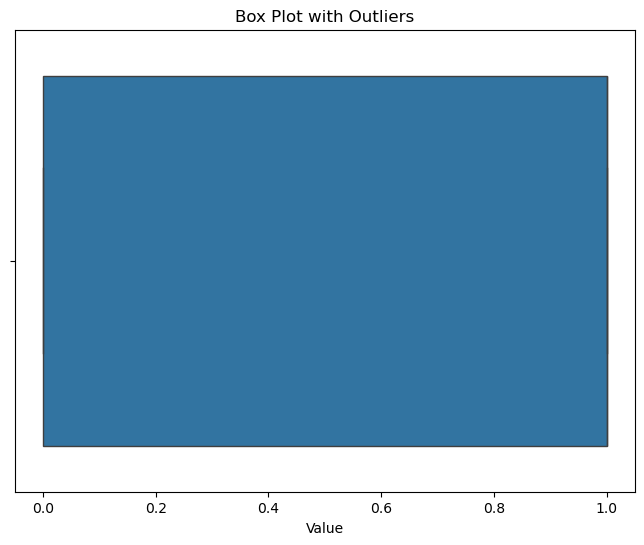

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['Late_delivery_risk'])

plt.title('Box Plot with Outliers')
plt.xlabel('Value')

plt.show()

In [32]:
from sklearn.metrics import roc_curve, auc

In [34]:
y_prob = bnb_model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [36]:
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

AUC: 0.80


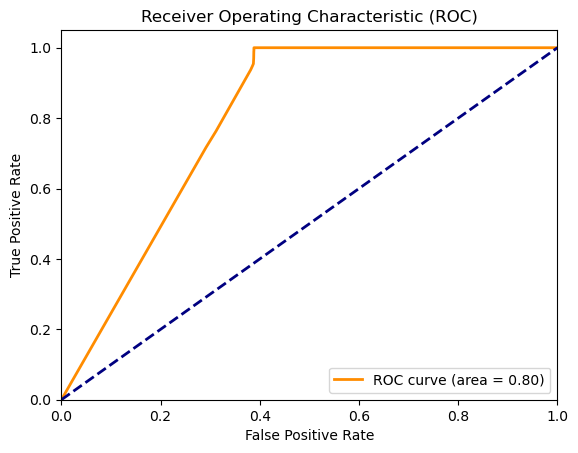

In [38]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

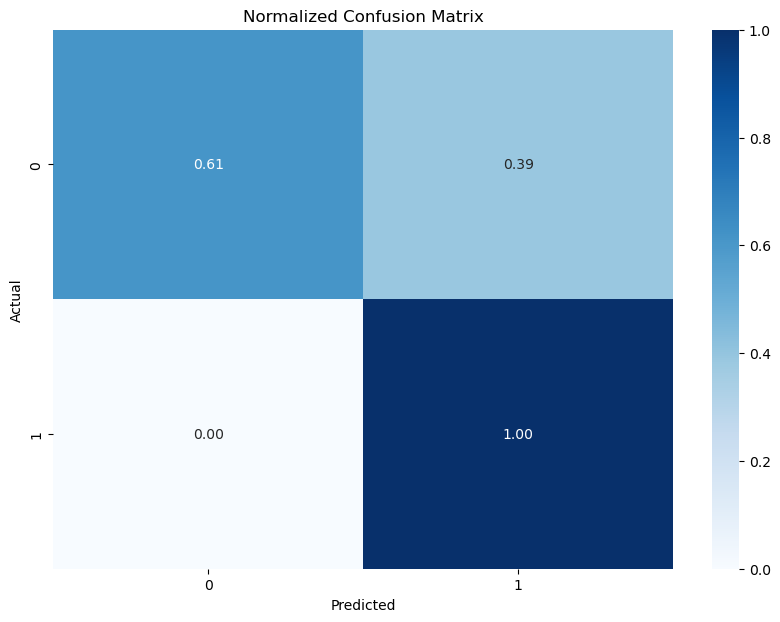

In [42]:
cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=bnb_model.classes_, yticklabels=bnb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [44]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

pr_auc = auc(recall, precision)
'''print(f'Precision-Recall AUC: {pr_auc:.2f}')
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Bernoulli Naive Bayes')
plt.legend(loc='lower left')
plt.show()'''

"print(f'Precision-Recall AUC: {pr_auc:.2f}')\nplt.figure()\nplt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')\nplt.xlabel('Recall')\nplt.ylabel('Precision')\nplt.title('Precision-Recall Curve for Bernoulli Naive Bayes')\nplt.legend(loc='lower left')\nplt.show()"

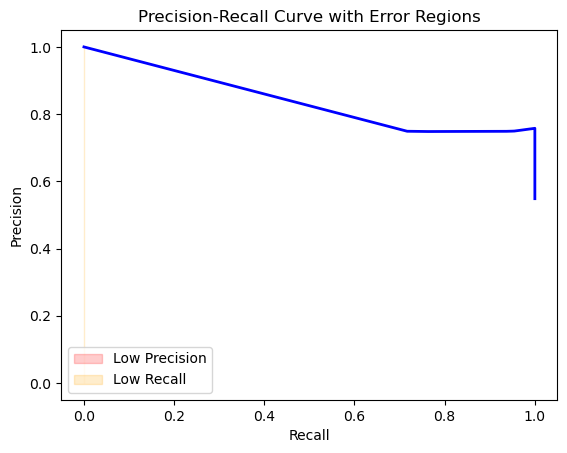

In [46]:
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)

low_precision_threshold = 0.5
low_recall_threshold = 0.5

plt.fill_between(recall, precision, where=(precision < low_precision_threshold), color='red', alpha=0.2, label='Low Precision')
plt.fill_between(recall, precision, where=(recall < low_recall_threshold), color='orange', alpha=0.2, label='Low Recall')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Error Regions')
plt.legend(loc='lower left')
plt.show()